In [1]:
"""
ÖDEV Açıklama:

Ödev aşağıdaki adımlarla ilerlemektedir. Python dosyasında "###  ###" açıklama satırlarından 
sonra gelen yerlerin doldurulması beklenilmektedir.

1- Kendi Elinizi içeren resmi (el_tespiti_1.jpg olarak) open cv kütüphanesini kullanarak yükleyeceğiz.
2- Gri ton (gray scale) formatımıza çevireceğiz. 
3- Resmimizin yüksekliğini 960 ve genişliğini 640 yapacağız.
4- Resmimize 10*10 filtre uygulayınız.
5- Resmimizi BGR formatına çevirip, el_tespit_odev.jpg olarak data klasörü içerisine kaydedin. 
6- Resmimizi mediapipe kütüphanesi üzerinden okuyun 
7- Resmimiz üzerinde el tespiti işlemini gerçekleştirin 
8- Resmimizi BGR formatına çevirip, data klasörü altında "el_tespit_odev.jpg" olarak kaydedin.
"""

'\nÖDEV Açıklama:\n\nÖdev aşağıdaki adımlarla ilerlemektedir. Python dosyasında "###  ###" açıklama satırlarından \nsonra gelen yerlerin doldurulması beklenilmektedir.\n\n1- Kendi Elinizi içeren resmi (el_tespiti_1.jpg olarak) open cv kütüphanesini kullanarak yükleyeceğiz.\n2- Gri ton (gray scale) formatımıza çevireceğiz. \n3- Resmimizin yüksekliğini 960 ve genişliğini 640 yapacağız.\n4- Resmimize 10*10 filtre uygulayınız.\n5- Resmimizi BGR formatına çevirip, el_tespit_odev.jpg olarak data klasörü içerisine kaydedin. \n6- Resmimizi mediapipe kütüphanesi üzerinden okuyun \n7- Resmimiz üzerinde el tespiti işlemini gerçekleştirin \n8- Resmimizi BGR formatına çevirip, data klasörü altında "el_tespit_odev.jpg" olarak kaydedin.\n'

In [2]:
### kütüphaneler tanımlanır ###
import cv2
import numpy as np
import mediapipe as mp
from mediapipe import solutions
from mediapipe.tasks import python
from mediapipe.framework.formats import landmark_pb2
from mediapipe.tasks.python import vision
import matplotlib.pyplot as plt

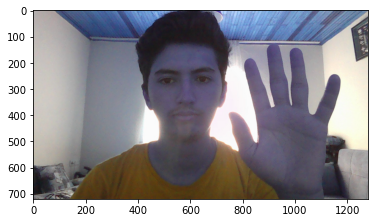

In [3]:
# elinizi içeren resmi (el_tespiti_1.jpg) open cv ile yüklenir.
image = cv2.imread("data/el_tespiti_1.jpg")
plt.imshow(image)

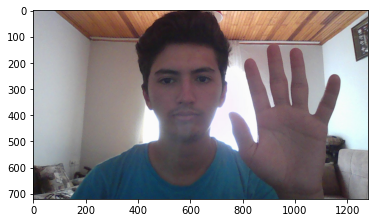

In [4]:
### resmi RGB formatına çeviriniz. ###
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

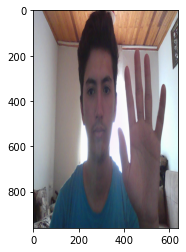

In [5]:
### resim yüksekliğini 960 genişliğini 640 olarak düzenleyiniz. ###
image = cv2.resize(image, (640,960))
plt.imshow(image)

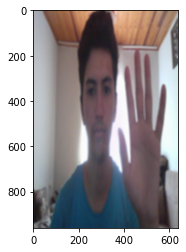

In [6]:
### resim üzerine 10*10 blur ekleyiniz. ###
image = cv2.blur(image,(10,10))
plt.imshow(image)

In [7]:
### resimi data klasörü altına "el_tespit_odev.jpg" olarak kaydediniz. ###
cv2.imwrite('data/el_tespit_odev.jpg',image)

True

In [8]:
# el_tespit_odev.jpg resmini mediapipe kütüphanesi üzerinden okunur. 
image = mp.Image.create_from_file("data\el_tespit_odev.jpg")

In [9]:
MARGIN=10 #metnin üst köşesinden elin sınırına olan mesafe
FONT_SIZE = 3 #yazı tipi boyutu
FONT_THICKNESS = 2 #yazı kalınlığı
HANDEDNESS_TEXT_COLOR = (255,0,0) #  kırmızı renk

In [10]:
!wget -q https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task

In [11]:
base_options = python.BaseOptions(model_asset_path="hand_landmarker.task")
options=vision.HandLandmarkerOptions(base_options=base_options,num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

In [12]:
### resimin detect(el tespit edilmiş vektörize halini) oluşturun ###
image = mp.Image.create_from_file("data\el_tespiti_1.jpg")
detection_result = detector.detect(image)

In [13]:
def draw_landmarks_on_image(rgb_image, detection_result):
  hand_landmarks_list = detection_result.hand_landmarks
  handedness_list = detection_result.handedness
  annotated_image = np.copy(rgb_image)

  # Loop through the detected hands to visualize.
  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]

    # Draw the hand landmarks.
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())

    # Get the top left corner of the detected hand's bounding box.
    height, width, _ = annotated_image.shape
    x_coordinates = [landmark.x for landmark in hand_landmarks]
    y_coordinates = [landmark.y for landmark in hand_landmarks]
    text_x = int(min(x_coordinates) * width)
    text_y = int(min(y_coordinates) * height) - MARGIN

    # Draw handedness (left or right hand) on the image.
    cv2.putText(annotated_image, f"{handedness[0].category_name}",
                (text_x, text_y), cv2.FONT_HERSHEY_DUPLEX,
                FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv2.LINE_AA)

  return annotated_image

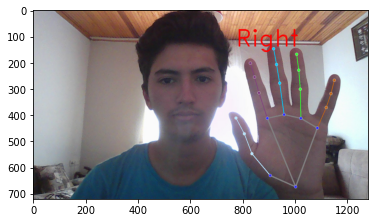

In [14]:
### resimin el tespiti yapılmış görsel halini hesaplayın ###
annotated_image = draw_landmarks_on_image(image.numpy_view(),detection_result)
plt.figure()
plt.imshow(annotated_image)

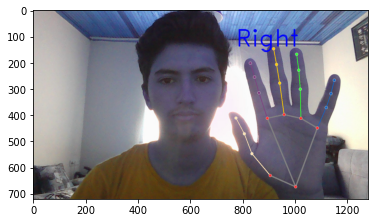

In [15]:
### resimin el tespiti yapılmış görsel halini BGR formatına çevirin  ###
annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR)
plt.imshow(annotated_image)

In [16]:
# resmi data klasörü içerisine "el_tespit_odev.jpg" olarak kaydedilir. 
cv2.imwrite("data/el_tespit_odev.jpg",annotated_image)

True